In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from konlpy.tag import Okt         ; t = Okt()     # 구 트위터
from konlpy.tag import *

import nltk
import pickle

In [ ]:
df_without = pd.read_csv('./without_name/all_headlines_without_names.tsv', sep="\t")
df_without.shape, 

((611511, 2),)

In [ ]:
# Unique value

df_without['주가변동'].nunique()

2

In [ ]:
# Unique value
df_without['뉴스제목'].nunique(), df_without['주가변동'].nunique()

(563319, 2)

In [ ]:
# Remove Duplicates
df_without.drop_duplicates(subset=['뉴스제목'], inplace=True) #reviews열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 : ',len(df_without))

총 샘플의 수 :  563320


In [ ]:
# NULL값 유무
print(df_without.isnull().values.any())


True


In [ ]:
# Remove Null rows
df_without = df_without.dropna(how='any',axis=0)
print(df_without.isnull().values.any())

False


In [ ]:
# after removing Null and Duplicates

df_without.shape

(563319, 2)

In [ ]:
without_len = df_without['뉴스제목'].astype(str).apply(len)
# print(without_len.head())
print("Max Length: ", without_len.max())
print("Min Length: ", without_len.min())



Max Length:  48
Min Length:  2


In [ ]:
df_without['str_len']= df_without['뉴스제목'].str.len()


git test delete later

In [ ]:
df_without.loc[(df_without['str_len'] < 10)]


,뉴스제목,주가변동,str_len
203,[인사],0,5
340,"조합원, 거리로",0,9
569,", 감사본부 신설",0,9
880,현금 배당 결정,0,9
884,행복나눔 바자회,0,9
...,...,...,...
608548,공개된 EV6,0,8
608716,광주백화점 전경,1,8
609303,'희망공부방',1,8
610091,'공매도 몸살',0,9


In [ ]:
df_without['뉴스제목'].head

<bound method NDFrame.head of 0                            24, 와인 경쟁력 강화로 가맹점 매출 높인다
1                       ENM, 1분기 매출 8108억원, 영업이익 397억원
2                             최신원  회장, '다락휴'로 호텔사업 키운다
3                        , 게임박스에 인디게임 3종 출시…토종 생태계 키운다
4                         신한금투 "현대·차 1분기 영업익 기대치 밑돌 듯"
                              ...                     
611506            [ET투자뉴스]케이씨텍, "하반기부터 수주 모…" BUY(유지)-
611507    [ET투자뉴스], "북미회담 쇼크 반영…" MARKETPERFORM-대신증...
611508                   , 사내 자선경매 수익금 장애 어린이 위해 전액 기부
611509                     ·S, '5G 월드 어워드' 잇따라 수상 '쾌거'
611510                 신한은행, 리테일과 손잡고 '백만원 챌린지' 이벤트 실시
Name: 뉴스제목, Length: 563319, dtype: object>

최단:  2
최장:  48
평균:  28
(48,)


Text(0.5, 1.0, 'Sentence Length Distribution (Without)')

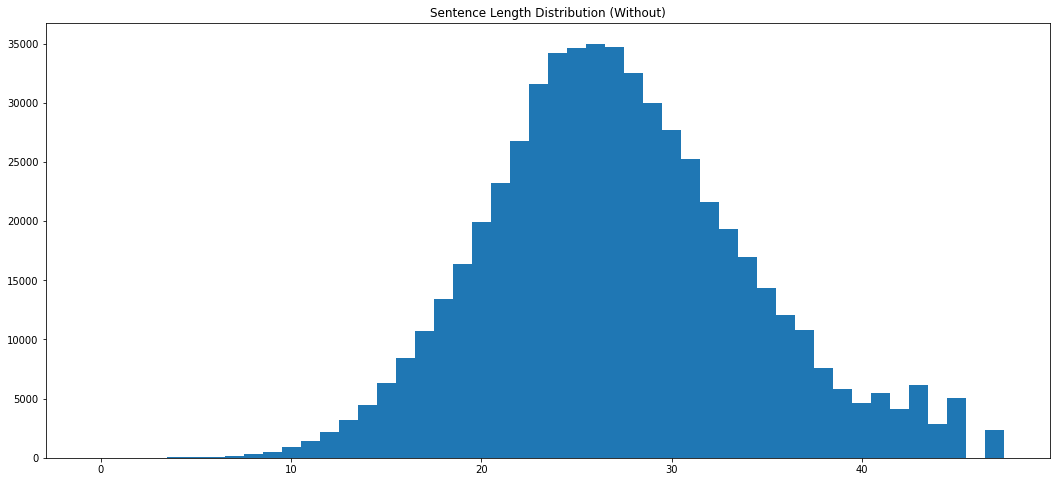

In [ ]:
min_len = 999
max_len = 0
sum_len = 0

raw = df_without['뉴스제목'].tolist()

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("최단: ", min_len)
print("최장: ", max_len)
print("평균: ", sum_len//len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
  sentence_length[len(sen)-1] += 1

print(sentence_length.shape)

f, ax = plt.subplots(figsize=(18,8))

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution (Without)")

In [ ]:

without_head = [x for x in df_without['뉴스제목'] if type(x) is str]

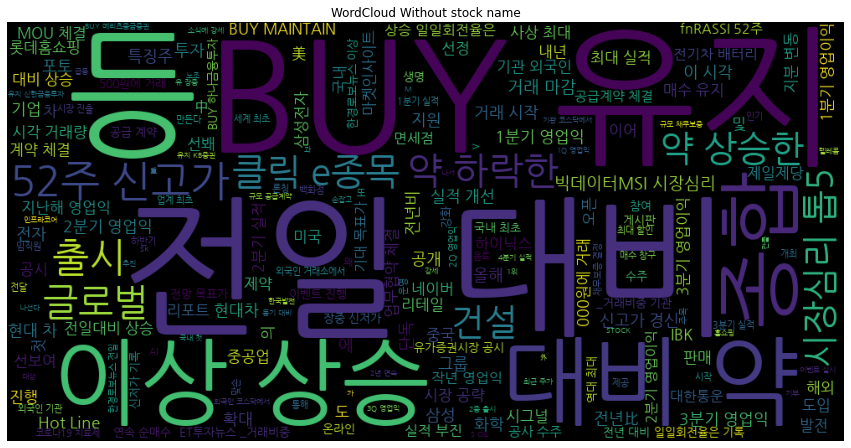

In [15]:
wordcloud = WordCloud(font_path='./fonts/NanumGothic.ttf', width=1000, height=500).generate(' '.join(without_head))
plt.figure(figsize=(15,10))
plt.title("WordCloud Without stock name")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now really want to see what I can do with the data.

<AxesSubplot:>

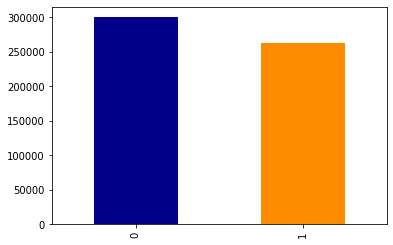

In [16]:
df_without['주가변동'].value_counts().plot.bar(color=['darkblue','darkorange'])

In [17]:
# df_without = pd.read_csv('./without_name/all_headlines_without_names.tsv', sep="\t")

df_without.to_csv('./without_name/EDA_headlines_no_scale.tsv', index=False, encoding='utf-8', sep="\t")


In [18]:
df_without.head()

,뉴스제목,주가변동,str_len
0,"24, 와인 경쟁력 강화로 가맹점 매출 높인다",0,25
1,"ENM, 1분기 매출 8108억원, 영업이익 397억원",0,31
2,"최신원 회장, '다락휴'로 호텔사업 키운다",0,24
3,", 게임박스에 인디게임 3종 출시…토종 생태계 키운다",0,29
4,"신한금투 ""현대·차 1분기 영업익 기대치 밑돌 듯""",1,28


In [19]:
df_without['뉴스제목'] = df_without['뉴스제목'].str.replace('\s+', ' ', regex=True)
df_without['뉴스제목'] = df_without['뉴스제목'].map(lambda x: re.sub('[0-9,.!·,…*>%@#&$<_?.:\“\/\”\’\'\"\^\\‘\|\`\(\)\[\]\{\}]', '', x))
df_without['뉴스제목'] = df_without['뉴스제목'].map(lambda x: re.sub('\u200c', '', x))
df_without['뉴스제목'] = df_without['뉴스제목'].map(lambda x: re.sub('[-–ㆍ]', ' ', x))

In [20]:
df_without.sample(30)

,뉴스제목,주가변동,str_len
346758,전자디스플레이 상반기 신입 공채 안해,1,22
73654,윤석헌 금감원장 취임일 간담회 즉시연금 보험사가 책임 필요하면,0,44
1911,보행장애 아동 위해 NGO 굿피플과 업무 협약,1,29
535062,LG전자현대모비스고려아연 등 올 하반기 막바지 수시채용 한창,1,36
604794,컨소시엄 대구 달성파크 푸르지오 힐스테이트 분양,0,30
250455,제작한 G마켓 잘됨파티 광고온라인서 인기몰이,1,28
258360,초우량고객 대상 VVIP종신보험 출시,0,25
30634,ENM 원 오른 원에 거래 마감,0,38
139784,강국현 사장 김영란법 위반 혐의로 입건,0,25
117083,카니발 하이리무진 인승 출시발 마사지기 등 편의성↑,1,31


In [21]:
df_without['str_len']= df_without['뉴스제목'].str.len()
df_without.loc[(df_without['str_len'] < 10)]

,뉴스제목,주가변동,str_len
51,검찰 압수수색 왜,0,9
203,인사,0,3
257,원에 거래 시작,0,9
315,더 뉴 K 출시,1,9
340,조합원 거리로,0,8
...,...,...,...
609547,+ 상승폭 확대,0,9
610091,공매도 몸살,0,7
610295,신세계 만주 처분,0,9
610444,셀 특허권 취득,0,8


In [22]:
df_without['okt'] = df_without.apply(lambda row: t.morphs(row['뉴스제목']), axis=1)

df_without.head()

KeyboardInterrupt: 

In [ ]:
without_up = df_without[df_without['주가변동'] == 1]
without_down = df_without[df_without['주가변동'] == 0]

In [ ]:
tokens_up = without_up.뉴스제목.values.tolist()
title_text = ''
for each_line in tokens_up:
    title_text = title_text + each_line + '\n'

tokens_up = t.morphs(title_text)
up = nltk.Text(tokens_up)
print("토큰 전체 개수: ", len(up.tokens))          # 토큰 전체 개수
print("토큰 unique 개수: ", len(set(up.tokens)))     # 토큰 unique 개수

토큰 전체 개수:  2713138
토큰 unique 개수:  59817


In [ ]:
tokens_down = without_down.뉴스제목.values.tolist()
title_text = '' 
for each_line in tokens_down:
    title_text = title_text + each_line + '\n'

tokens_down = t.morphs(title_text)
down = nltk.Text(tokens_down)
print("토큰 전체 개수: ", len(down.tokens))          # 토큰 전체 개수
print("토큰 unique 개수: ", len(set(down.tokens)))     # 토큰 unique 개수

In [ ]:
def returnNotMatches(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]]

up_only, down_only = returnNotMatches(tokens_up, tokens_down)
len(up_only), len(down_only)

(34625, 43804)

In [ ]:
# Save pickle
with open('./without_name/without_len_okt.pkl', 'wb') as f:
    pickle.dump(df_without, f)
with open('./without_name/without_up_only.pkl', 'wb') as f:
    pickle.dump(up_only, f)
with open('./without_name/without_down_only.pkl', 'wb') as f:
    pickle.dump(down_only, f)

In [3]:
# Load pickle
with open('./without_name/without_len_okt.pkl', 'rb') as f:
    df_without = pickle.load(f)
with open('./without_name/without_up_only.pkl', 'rb') as f:
    up_only = pickle.load(f)
with open('./without_name/without_down_only.pkl', 'rb') as f:
    down_only = pickle.load(f)

In [4]:
stop_words = ['\u200c','\n ','\n',"'",'…',',','[',']','(',')','"','주','에','·','장','-','적',\
              '도','‘','`','가','’','의','이','★','은','“','대','”','한','B','로',\
              '?','선','A','는','!','"…','상','들','제','…"','일','서','명',"'…",'기',\
              '···','소','등','자','전','률','미','...','세','시','안','폭',"…'",'만','억',\
              '눈','더','량','고','인','성','다','감','을','지','수','것','째',\
              '기','···','중','계','왜','총','내','과','젠','또','연','엔','차','할',\
              '새','사','때','..','임','속','’…','G','나','개','원',\
             '달','→','권','?…','간','배','K','저','와','하','/','조','두','분','형',\
             '황','공','&','보','문','익','X','억원',']"','치','산','를','오','해','S','그','된','준','▶',\
             '건','재','반','라','년','초','분','월','신','p','급','줄','경','구','진','올','발','vs','강',\
             '국','난','판','면','"(','`…','살','아','번','텍','팜','Q','메','점','월',\
             'D','비','됐다','채',"]'",'보니','손','확','종','동','팔','타','~','땐','말','요',\
             "',",'스','…`','단','길','회','호','용','듯','최']

up_only = [each_word for each_word in up_only if each_word not in stop_words]
up = nltk.Text(up_only)

print(up.vocab().most_common(200))

down_only = [each_word for each_word in down_only if each_word not in stop_words]
down = nltk.Text(down_only)

print(down.vocab().most_common(200))

[('페시', 37), ('행정조사', 34), ('빈민가', 31), ('우륵', 30), ('다이나믹스', 26), ('보쌈김치', 24), ('피나', 23), ('그랜버드', 23), ('할리데이비슨', 23), ('스피릿', 22), ('코윈', 21), ('유연석', 20), ('졸레어', 19), ('임대규', 19), ('부르켓', 19), ('웨하스', 19), ('카페리선', 18), ('영계', 18), ('생생우동', 18), ('외상', 18), ('CPhI', 18), ('동파', 18), ('보헴', 17), ('빌스', 17), ('프로게임단', 17), ('배기은', 16), ('UX', 16), ('서성환', 16), ('개비', 16), ('비니', 16), ('Powered', 15), ('정인호', 15), ('루카', 15), ('원빈', 15), ('민공', 15), ('왕건', 14), ('남원', 14), ('티프', 14), ('사이드바', 14), ('향남', 14), ('쇼콜라', 14), ('브플먼트', 14), ('키썸', 14), ('EOA', 14), ('키우', 14), ('리비아', 14), ('CVVD', 14), ('이채', 14), ('콩국수', 14), ('카프로', 13), ('최윤', 13), ('MCNS', 13), ('쿠키앤크림', 13), ('과테말라', 13), ('KBR', 13), ('오스프리', 13), ('미쯔', 13), ('실상', 13), ('정병국', 13), ('NPU', 13), ('스택', 13), ('겟트', 13), ('함부르크', 13), ('바르샤바', 13), ('주심', 13), ('유소연', 13), ('팅실', 13), ('XLPE', 12), ('귀농', 12), ('AIoT', 12), ('하이큐브', 12), ('송파대로', 12), ('웰치', 12), ('다롄시', 12), ('토다', 12), ('실리카겔', 12), ('팔렘방', 12)

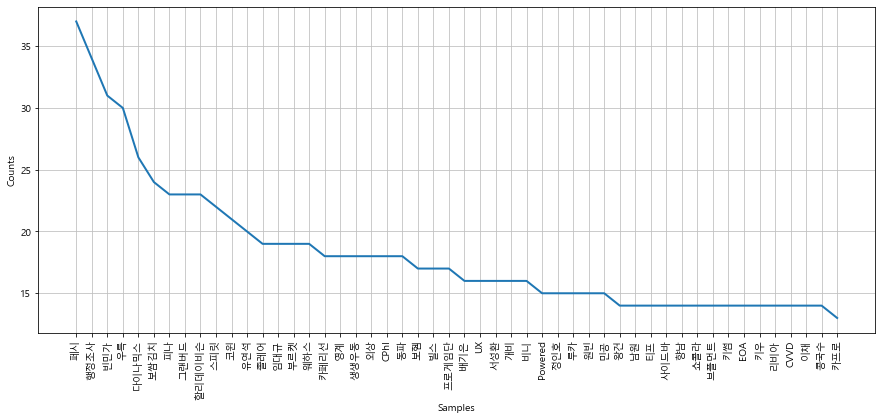

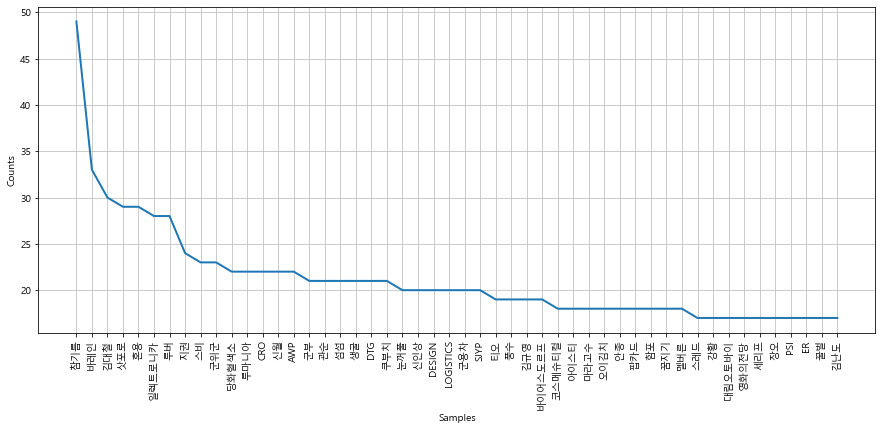

In [25]:
# 그래프에서 한글 폰트가 깨질 경우 실행
up = nltk.Text(up_only)
down = nltk.Text(down_only)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,6))
up.plot(50)
plt.figure(figsize=(15,6))
down.plot(50)
plt.show()

In [26]:
print("토큰 전체 개수: ", len(up.tokens))          # 토큰 전체 개수
print("토큰 unique 개수: ", len(set(up.tokens)))   
print("토큰 전체 개수: ", len(down.tokens))          # 토큰 전체 개수
print("토큰 unique 개수: ", len(set(down.tokens)))   

토큰 전체 개수:  23518
토큰 unique 개수:  13220
토큰 전체 개수:  30234
토큰 unique 개수:  15813


In [5]:
df_without.head()

,뉴스제목,주가변동,str_len,okt
0,와인 경쟁력 강화로 가맹점 매출 높인다,0,22,"[와인, 경쟁력, 강화, 로, 가맹, 점, 매출, 높인다]"
1,ENM 분기 매출 억원 영업이익 억원,0,21,"[ENM, 분기, 매출, 억원, 영업, 이익, 억원]"
2,최신원 회장 다락휴로 호텔사업 키운다,0,20,"[최신원, 회장, 다락, 휴, 로, 호텔, 사업, 키운다]"
3,게임박스에 인디게임 종 출시토종 생태계 키운다,0,26,"[게임, 박스, 에, 인디, 게임, 종, 출시, 토종, 생태계, 키운다]"
4,신한금투 현대차 분기 영업익 기대치 밑돌 듯,1,24,"[신, 한, 금투, 현대차, 분기, 영업, 익, 기, 대치, 밑돌, 듯]"


<BarContainer object of 60 artists>

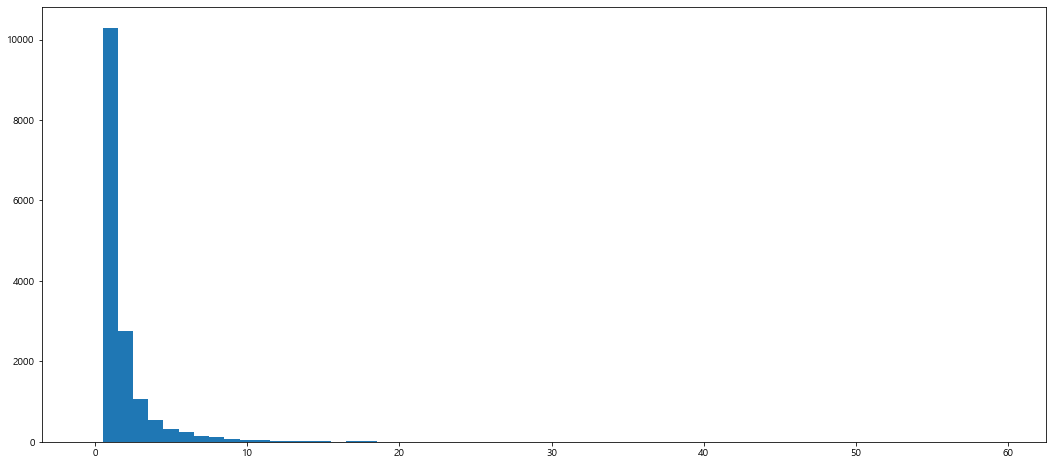

In [29]:
down_words_c = np.zeros((60), dtype=np.int)

for sen in [item[1] for item in temp_down]:
  down_words_c[int(sen)] += 1

f, ax = plt.subplots(figsize=(18,8))
plt.bar(range(60), down_words_c, width=1.0)

<BarContainer object of 60 artists>

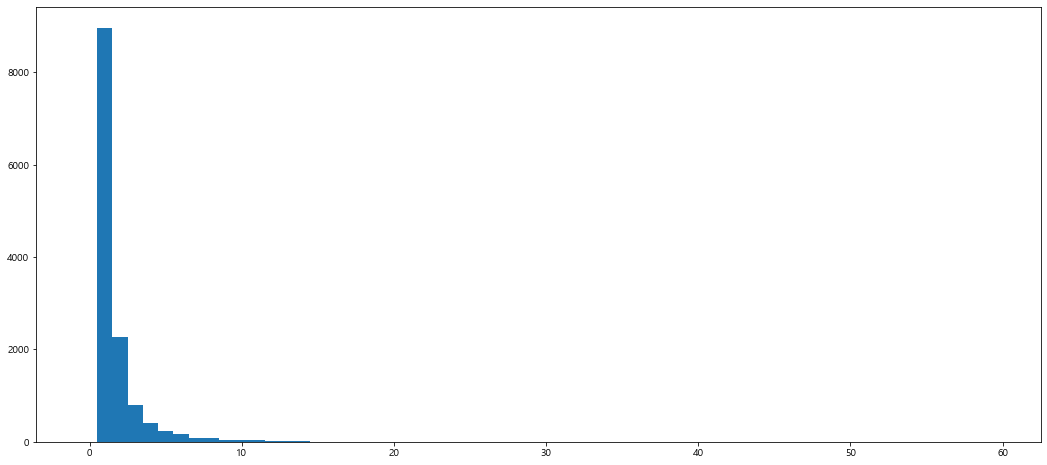

In [30]:
up_words_c = np.zeros((60), dtype=np.int)

for sen in [item[1] for item in temp_up]:
  up_words_c[int(sen)] += 1

f, ax = plt.subplots(figsize=(18,8))
plt.bar(range(60), up_words_c, width=1.0)

In [31]:
print("up words which appeared only 1: ", up_words_c[1])
print("down words which appeared only 1: ", down_words_c[1])

up words which appeared only 1:  8972
down words which appeared only 1:  10297


In [32]:
up_only_unique = set(up_only)
down_only_unique = set(down_only)

In [33]:
len(up_only), len(down_only), len(up_only_unique), len(down_only_unique)

(23518, 30234, 13220, 15813)

In [34]:
up_words_bog = set(up_words_c)

In [ ]:
df_without.head(100)

In [36]:
idx=0
df_without['u_score'] = ''
df_without['u_words'] = ''
for sen in df_without['okt']:
    temp = list()
    # print(i)
    for i in sen:
        for c in up_only_unique:
            score = 0
            if i == c:
                score +=1
                temp.append(c)

    df_without['u_score'][idx] = score

    df_without['u_words'][idx] = temp
    idx += 1

idx=0
df_without['d_score'] = ''
df_without['d_words'] = ''
for sen in df_without['okt']:
    temp = list()
    for i in sen:
        for c in down_only_unique:
            score = 0
            if i == c:
                score -=1
                temp.append(c)
    df_without['d_score'][idx] = score

    df_without['d_words'][idx] = temp
    idx += 1
    


C:\Users\hgcho\AppData\Local\Temp/ipykernel_12312/994621548.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without['u_score'][idx] = score
C:\Users\hgcho\AppData\Local\Temp/ipykernel_12312/994621548.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without['u_words'][idx] = temp
C:\Users\hgcho\AppData\Local\Temp/ipykernel_12312/994621548.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without['d_score'][idx] = sc

In [38]:
# Save pickle
with open('./without_name/without_score_words.pkl', 'wb') as f:
    pickle.dump(df_without, f)
with open('./without_name/without_up_unique.pkl', 'wb') as f:
    pickle.dump(up_only_unique, f)
with open('./without_name/without_down_unique.pkl', 'wb') as f:
    pickle.dump(down_only_unique, f)

In [6]:
df_without.head()

,뉴스제목,주가변동,str_len,okt
0,와인 경쟁력 강화로 가맹점 매출 높인다,0,22,"[와인, 경쟁력, 강화, 로, 가맹, 점, 매출, 높인다]"
1,ENM 분기 매출 억원 영업이익 억원,0,21,"[ENM, 분기, 매출, 억원, 영업, 이익, 억원]"
2,최신원 회장 다락휴로 호텔사업 키운다,0,20,"[최신원, 회장, 다락, 휴, 로, 호텔, 사업, 키운다]"
3,게임박스에 인디게임 종 출시토종 생태계 키운다,0,26,"[게임, 박스, 에, 인디, 게임, 종, 출시, 토종, 생태계, 키운다]"
4,신한금투 현대차 분기 영업익 기대치 밑돌 듯,1,24,"[신, 한, 금투, 현대차, 분기, 영업, 익, 기, 대치, 밑돌, 듯]"
